# Question 1

In [35]:
import pandas as pd

### Importing the dataset

In [36]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [37]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
users = pd.read_csv(url, sep='|')

In [38]:
mean_age_by_occupation = users.groupby('occupation')['age'].mean()

In [39]:
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['gender_n'] = users['gender'].apply(gender_to_numeric)
male_ratio_by_occupation = users.groupby('occupation')['gender_n'].mean().sort_values(ascending=False)

In [43]:
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

In [44]:
mean_age_by_occ_and_gender = users.groupby(['occupation', 'gender'])['age'].mean()

In [46]:
gender_counts_by_occupation = users.groupby(['occupation', 'gender'])['gender'].count()
total_counts_by_occupation = users.groupby('occupation')['gender'].count()
gender_percentage_by_occupation = (gender_counts_by_occupation / total_counts_by_occupation) * 100
gender_percentage_by_occupation = gender_percentage_by_occupation.unstack()

In [54]:
print('Mean age by occupation:\n', mean_age_by_occupation)

Mean age by occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [50]:
print('\nMale ratio by occupation (from highest to lowest):\n', male_ratio_by_occupation)



Male ratio by occupation (from highest to lowest):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_n, dtype: float64


In [51]:
print('\nMinimum and maximum age by occupation:\n', min_max_age_by_occupation)


Minimum and maximum age by occupation:
                min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [52]:
print('\nMean age by occupation and gender:\n', mean_age_by_occ_and_gender)


Mean age by occupation and gender:
 occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028

In [53]:
print('\nGender percentage by occupation:\n', gender_percentage_by_occupation)


Gender percentage by occupation:
 gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# Question 2

In [107]:
import pandas as pd

In [108]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

In [123]:
goals = euro12['Goals']
print(euro12.Goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [124]:
num_teams = euro12.shape[0]
print("Number of teams participated in Euro2012:", len(euro12))

Number of teams participated in Euro2012: 16


In [126]:
num_cols = euro12.shape[1]
print("The number of columns in the dataset is:", euro12.shape[1])

The number of columns in the dataset is: 35


In [127]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [128]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [129]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(mean_yellow_cards)

7.4375


In [130]:
high_scoring_teams = euro12[euro12['Goals'] > 6]
print(high_scoring_teams)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [131]:
G_teams = euro12[euro12['Team'].str.startswith('G')]
print(G_teams)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [132]:
first_7_cols = euro12.iloc[:, :7]
print(first_7_cols)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [133]:
all_cols_except_last_3 = euro12.iloc[:, :-3]
print(all_cols_except_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [134]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3

In [157]:
import pandas as pd
import numpy as np

In [158]:
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

In [165]:
housing = pd.concat([series1, series2, series3], axis=1)
print(housing)

    0  1      2
0   4  1  11237
1   2  3  12296
2   2  2  23936
3   3  3  23876
4   3  2  21872
.. .. ..    ...
95  3  1  11664
96  4  1  14620
97  3  3  18184
98  4  2  19285
99  3  1  26349

[100 rows x 3 columns]


In [166]:
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(housing.columns)

Index(['bedrs', 'bathrs', 'price_sqr_meter'], dtype='object')


In [167]:
bigcolumn = pd.concat([series1, series2, series3], axis=0)
print(bigcolumn)

0         4
1         2
2         2
3         3
4         3
      ...  
95    11664
96    14620
97    18184
98    19285
99    26349
Length: 300, dtype: int64


In [162]:
print(bigcolumn.index.max() == 99)

True


In [164]:
df = pd.concat([series1, series2, series3], axis=1).reset_index(drop=True)
print(df)

    0  1      2
0   4  1  11237
1   2  3  12296
2   2  2  23936
3   3  3  23876
4   3  2  21872
.. .. ..    ...
95  3  1  11664
96  4  1  14620
97  3  3  18184
98  4  2  19285
99  3  1  26349

[100 rows x 3 columns]


# Question 4

In [51]:
import pandas as pd
import numpy as np


In [52]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])


In [53]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0,1,2]])
data.set_index('Yr_Mo_Dy', inplace=True)


In [54]:
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year*10000+x.month*100+x.day, format='%Y%m%d')

data.index = data.index.map(fix_year)


In [55]:
missing_values_count = data.isnull().sum()


In [56]:
non_missing_values_count = data.notnull().sum().sum()


In [57]:
mean_windspeed = data.mean().mean()


In [58]:
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()


In [59]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)


In [60]:
january_data = data[data.index.month == 1]
january_data.groupby(january_data.index.year).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1962,14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
1963,14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
1964,12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
1965,15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
1966,15.834839,13.283226,15.136452,8.659355,12.968065,9.163548,12.150000,10.475806,8.750645,10.739677,14.074516,15.554194
1967,13.736129,11.470968,11.537419,6.928065,10.833548,6.730323,9.787419,7.474839,7.627097,10.169032,13.457742,17.124516
1968,14.733226,12.829032,12.294194,7.849032,12.262581,7.133226,12.395806,9.225806,9.415484,9.255161,14.213871,19.095484
1969,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742


In [61]:
data.groupby(data.index.year).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [62]:
data.groupby([data.index.year, data.index.month]).mean()


RPT        VAL        ROS       KIL        SHA  \
Yr_Mo_Dy Yr_Mo_Dy                                                         
1961     1         14.841333  11.988333  13.431613  7.736774  11.072759   
         2         16.269286  14.975357  14.441481  9.230741  13.852143   
         3         10.890000  11.296452  10.752903  7.284000  10.509355   
         4         10.722667   9.427667   9.998000  5.830667   8.435000   
         5          9.860968   8.850000  10.818065  5.905333   9.490323   
...                      ...        ...        ...       ...        ...   
1978     8          9.645161   8.259355   9.032258  4.502903   7.368065   
         9         10.913667  10.895000  10.635000  5.725000  10.372000   
         10         9.897742   8.670968   9.295806  4.721290   8.525161   
         11        16.151667  14.802667  13.508000  7.317333  11.475000   
         12        16.175484  13.748065  15.635161  7.094839  11.398710   

                         BIR        DUB        CLA        MUL        CLO  \
Yr_Mo_Dy Yr_Mo_Dy                                                          
1961     1          8.588065  11.184839   9.245333   9.085806  10.107419   
         2         10.937500  11.890714  11.846071  11.821429  12.714286   
         3          8.866774   9.644194   9.829677  10.294138  11.251935   
         4          6.495000   6.925333   7.094667   7.342333   7.237000   
         5          6.574839   7.604000   8.177097   8.039355   8.499355   
...                      ...        ...        ...        ...        ...   
1978     8          5.935161   5.650323   5.417742   7.241290   5.536774   
         9          9.278333  10.790333   9.583000  10.069333   8.939000   
         10         6.774194   8.115484   7.337742   8.297742   8.243871   
         11         8.743000  11.492333   9.657333  10.701333  10.676000   
         12         9.241613  12.077419  10.194839  10.616774  11.028710   

                         BEL        MAL  
Yr_Mo_Dy Yr_Mo_Dy                        
1961     1         13.880968  14.703226  
         2         18.583214  15.411786  
         3         16.410968  15.720000  
         4         11.147333  10.278333  
         5         11.900323  12.011613  
...                      ...        ...  
1978     8         10.466774  12.054194  
         9         15.680333  19.391333  
         10        13.776774  17.150000  
         11        17.404667  20.723000  
         12        13.859677  21.371613  

[216 rows x 12 columns]

In [63]:
data.groupby(pd.Grouper(freq='W')).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [64]:
# Min Max Mean and Std
weekly_data = data.loc['1961-01-02':'1961-12-31'].resample('W').mean()


weekly_stats = pd.DataFrame({
    'min': weekly_data.min(axis=1),
    'max': weekly_data.max(axis=1),
    'mean': weekly_data.mean(axis=1),
    'std': weekly_data.std(axis=1)
})


print(weekly_stats.head(52))

                  min        max       mean       std
Yr_Mo_Dy                                             
1961-01-08   6.417143  13.541429   9.847659  2.601705
1961-01-15   4.630000  12.468571   8.353214  2.719649
1961-01-22   6.328571  13.204286   9.368413  2.224531
1961-01-29  12.720000  22.530000  16.958095  2.915635
1961-02-05   8.247143  16.827143  11.800357  2.807310
1961-02-12  10.774286  21.832857  15.891548  3.147412
1961-02-19   9.542857  21.167143  13.726825  3.105819
1961-02-26   8.524286  16.304286  12.604286  2.364323
1961-03-05   7.834286  17.842857  11.766766  2.535336
1961-03-12   6.881429  16.701429  10.612579  2.746233
1961-03-19   7.084286  19.350000  11.756310  3.320318
1961-03-26   6.648571  18.134286  10.462857  3.071975
1961-04-02   7.300000  13.900000  10.268433  1.883742
1961-04-09   5.958571  13.607143   9.412381  2.399840
1961-04-16   4.947143   9.482857   6.845595  1.803831
1961-04-23   7.768571  13.620000  10.146667  1.895943
1961-04-30   4.801429  10.11

# Question 5

In [218]:
import pandas as pd
import numpy as np

In [219]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

In [220]:
chipo = pd.read_csv(url, delimiter='\t')

In [221]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [222]:
print(f"The number of observations in the dataset is {len(chipo)}")

The number of observations in the dataset is 4622


In [223]:
print(f"The number of columns in the dataset is {len(chipo.columns)}")

The number of columns in the dataset is 5


In [224]:
print("Columns in the dataset:")
print(chipo.columns)

Columns in the dataset:
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [225]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [226]:
most_ordered = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(1)
print(f"The most-ordered item is:\n{most_ordered}")

The most-ordered item is:
item_name
Chicken Bowl    761
Name: quantity, dtype: int64


In [227]:
print(f"The number of items ordered for the most-ordered item is {most_ordered.values[0]}")

The number of items ordered for the most-ordered item is 761


In [228]:
most_ordered_desc = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(1)
print(f"The most ordered item in the choice_description column is:\n{most_ordered_desc}")

The most ordered item in the choice_description column is:
choice_description
[Diet Coke]    159
Name: quantity, dtype: int64


In [229]:
total_items_ordered = chipo['quantity'].sum()
print(f"The total number of items ordered is {total_items_ordered}")

The total number of items ordered is 4972


In [230]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))

print(chipo['item_price'].dtype)

float64


In [231]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"The revenue for the period in the dataset is ${revenue:.2f}")

The revenue for the period in the dataset is $39237.02


In [232]:
num_orders = len(chipo['order_id'].unique())
print(f"The number of orders made in the period is {num_orders}")

The number of orders made in the period is 1834


In [236]:
total_revenue = (chipo['item_price'] * chipo['quantity']).sum()

total_orders = chipo['order_id'].nunique()

avg_revenue_per_order = total_revenue / total_orders

print("The average revenue amount per order is: $", round(avg_revenue_per_order, 2))

The average revenue amount per order is: $ 21.39


# Question 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')

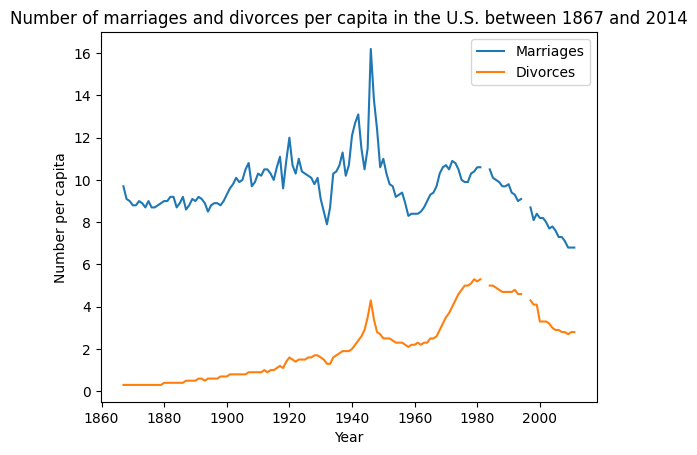

In [3]:
plt.plot(marriages_divorces.Year, marriages_divorces.Marriages_per_1000, label='Marriages')
plt.plot(marriages_divorces.Year, marriages_divorces.Divorces_per_1000, label='Divorces')
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Number of marriages and divorces per capita in the U.S. between 1867 and 2014')
plt.legend()
plt.show()

# Question 7

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the given source
data = pd.read_csv('us-marriages-divorces-1867-2014.csv') 

In [14]:
years = [1900, 1950, 2000]
subset = data[data['Year'].isin(years)]

In [18]:
subset = data[data['Year'].isin(years)].copy()
subset.loc[:, 'Marriages_per_capita'] = subset['Marriages'] / subset['Population']
subset.loc[:, 'Divorces_per_capita'] = subset['Divorces'] / subset['Population']

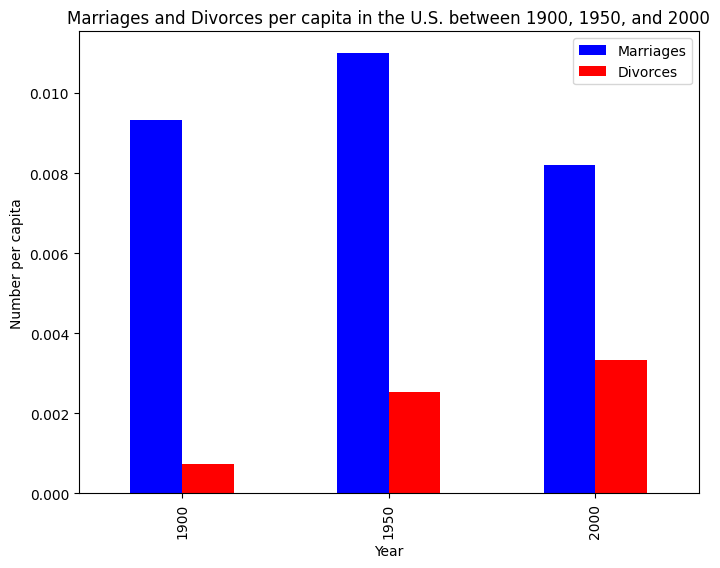

In [23]:
ax = subset.plot(x='Year', y=['Marriages_per_capita', 'Divorces_per_capita'], kind='bar', figsize=(8,6), color=['blue','red'])
ax.set_xlabel('Year')
ax.set_ylabel('Number per capita')
ax.set_title('Marriages and Divorces per capita in the U.S. between 1900, 1950, and 2000')
ax.legend(['Marriages', 'Divorces'])
plt.show()

# Question 8

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('actor_kill_counts.csv')

In [26]:
data = data.sort_values('Count', ascending=False)

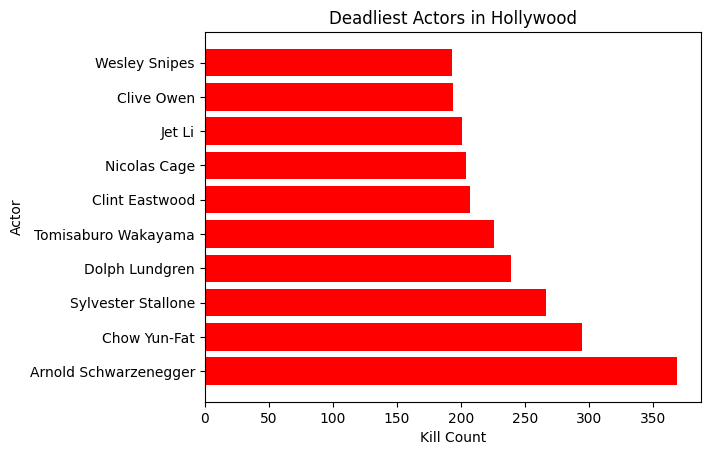

In [27]:
plt.barh(data['Actor'], data['Count'], color='red')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.show()

# Question 9

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('roman-emperor-reigns.csv')

In [30]:
num_assassinated = len(data[data['Cause_of_Death'] == 'Assassinated'])

In [31]:
num_not_assassinated = len(data) - num_assassinated


In [32]:
labels = ['Assassinated', 'Not Assassinated']

In [33]:
values = [num_assassinated, num_not_assassinated]

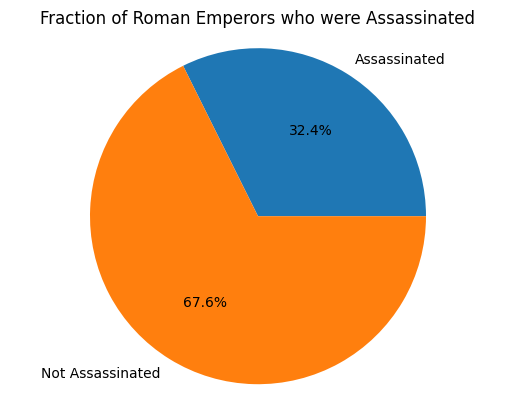

In [34]:
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fraction of Roman Emperors who were Assassinated')
plt.show()

# Question 10

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

In [38]:
by_year = data[['Year', 'Total Arcade Revenue (billions)', 'Computer Science Doctorates Awarded (US)']].groupby('Year')

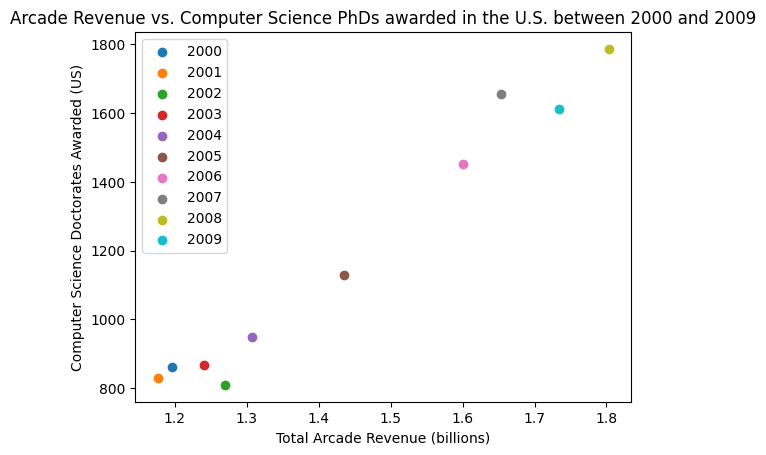

In [41]:
fig, ax = plt.subplots()
for year, group in by_year:
    ax.scatter(group['Total Arcade Revenue (billions)'], group['Computer Science Doctorates Awarded (US)'], label=year)
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')
ax.set_title('Arcade Revenue vs. Computer Science PhDs awarded in the U.S. between 2000 and 2009')
ax.legend()
plt.show()